In [2]:
%config Completer.use_jedi = False

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# source : https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand
path = 'C:/Users/ACER/Data science path/Jose lesson/DATA/SeoulBikeData.csv'
df = pd.read_csv(path)

In [11]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
with open('C:/Users/ACER/Data science path/Jose lesson/DATA/seoulbikedesc.txt') as bike_desc:
    for i in bike_desc:
        print(i)

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


In [13]:
#change the column names into proper name
df.columns = ['Date',
              'Rented Bike',
              'Day Hour',
              'Temperature_C',
              'Humidity_percent',
              'Wind speed_ms',
              'Visibility_10m',
              'Dew point temperature_C',
             'Solar Radiation_mjm2',
             'Rainfall_mm',
             'Snowfall_cm',
             'Seasons',
             'Holiday',
             'Weekday']

In [14]:
df.head()

,Date,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Weekday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
#column dtype check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike              8760 non-null   int64  
 2   Day Hour                 8760 non-null   int64  
 3   Temperature_C            8760 non-null   float64
 4   Humidity_percent         8760 non-null   int64  
 5   Wind speed_ms            8760 non-null   float64
 6   Visibility_10m           8760 non-null   int64  
 7   Dew point temperature_C  8760 non-null   float64
 8   Solar Radiation_mjm2     8760 non-null   float64
 9   Rainfall_mm              8760 non-null   float64
 10  Snowfall_cm              8760 non-null   float64
 11  Seasons                  8760 non-null   object 
 12  Holiday                  8760 non-null   object 
 13  Weekday                  8760 non-null   object 
dtypes: float64(6), int64(4),

In [16]:
#null value check
df.isnull().sum()

Date                       0
Rented Bike                0
Day Hour                   0
Temperature_C              0
Humidity_percent           0
Wind speed_ms              0
Visibility_10m             0
Dew point temperature_C    0
Solar Radiation_mjm2       0
Rainfall_mm                0
Snowfall_cm                0
Seasons                    0
Holiday                    0
Weekday                    0
dtype: int64

In [17]:
#duplicate value check
df[df.duplicated()]

,Date,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Weekday


In [18]:
#change column datetime correctly
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
#correlation check to to the target label
df.corr()['Rented Bike']

Rented Bike                1.000000
Day Hour                   0.410257
Temperature_C              0.538558
Humidity_percent          -0.199780
Wind speed_ms              0.121108
Visibility_10m             0.199280
Dew point temperature_C    0.379788
Solar Radiation_mjm2       0.261837
Rainfall_mm               -0.123074
Snowfall_cm               -0.141804
Name: Rented Bike, dtype: float64

In [20]:
#create custom function to inspect statistic of an array 
def array_stat(df,column):
    '''
    parameters;
    df: dataframe
    column:str, numerical variables and
    
    this function will return;
    q1: first quartile of the numerical variable
    q3: third quartile of the numerical variable
    low_limit: low limit of outlier consideration
    top_limit: top limit of outlier consideration
    outliers dataframe
    
    how to use:
    q1,q3,iqr,low_limit,top_limit,outliers = array_stat(df,column)
    
    
    '''
    q3,q1 = np.percentile(df[column],[75,25])
    iqr = q3-q1
    low_limit = q1 - 1.5*iqr
    top_limit = q3 + 1.5*iqr
    outliers = df.loc[(df[column]>top_limit) | (df[column]<low_limit)]
    return q1,q3,iqr,low_limit,top_limit,outliers
    
   

In [21]:
#temperature outliers
q1,q3,iqr,low_limit,top_limit,outliers = array_stat(df,'Temperature_C')
outliers

,Date,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Weekday


In [22]:
q1,q3,iqr,low_limit,top_limit,outliers = array_stat(df,'Humidity_percent')
outliers

,Date,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Weekday


(0, 14)
Rented Bike                1.000000
Day Hour                   0.410257
Temperature_C              0.538558
Humidity_percent          -0.199780
Wind speed_ms              0.121108
Visibility_10m             0.199280
Dew point temperature_C    0.379788
Solar Radiation_mjm2       0.261837
Rainfall_mm               -0.123074
Snowfall_cm               -0.141804
Name: Rented Bike, dtype: float64


<AxesSubplot:xlabel='Wind speed_ms'>

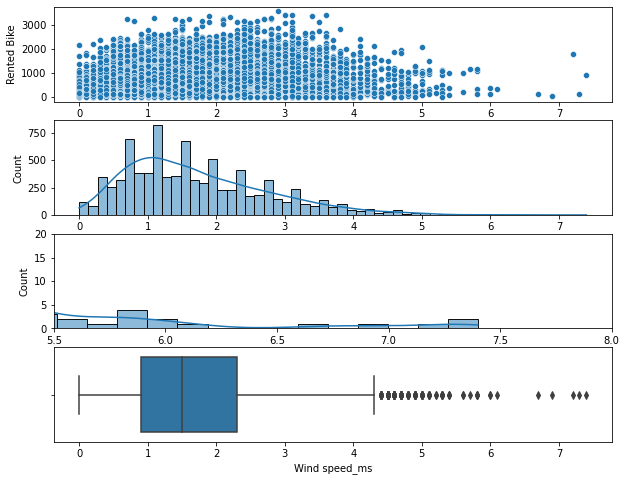

In [23]:
q1,q3,iqr,low_limit,top_limit,outliers_wind = array_stat(df,'Wind speed_ms')
print(outliers.shape) #(161, 14)

#corr check 
print(df.corr()['Rented Bike'])

fig,(ax,ax2,ax3,ax4) =plt.subplots(ncols=1,nrows=4,figsize=(10,8))
sns.scatterplot(data=df, x='Wind speed_ms', y = 'Rented Bike',ax=ax)
sns.histplot(data=df, x='Wind speed_ms',ax=ax2,kde=True)
#ax3.margins(x=0,y=-.25)
sns.histplot(data=df, x='Wind speed_ms',ax=ax3,kde=True)
ax3.axis([5.5,8,0,20])

sns.boxplot(data=df, x='Wind speed_ms',ax=ax4)

In [24]:
#percentage of the outliers
print((len(outliers)/len(df) * 100))

#because the outliers weren't that many
#we can cap/trim the value

ol_idx = outliers_wind.index.values
df.loc[df['Wind speed_ms']>top_limit,'Wind speed_ms'] = 3*iqr #run only once
q1,q3,iqr,low_limit,top_limit,outliers = array_stat(df,'Wind speed_ms')
outliers
#the outliers is gone

0.0


,Date,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Weekday


In [25]:
q1,q3,iqr,low_limit,top_limit,outliers = array_stat(df,'Visibility_10m')
outliers

,Date,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Weekday


In [26]:
q1,q3,iqr,low_limit,top_limit,outliers = array_stat(df,'Dew point temperature_C')
outliers

,Date,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Weekday


In [27]:
q1,q3,iqr,low_limit,top_limit,outliers = array_stat(df,'Dew point temperature_C')
outliers

,Date,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Weekday


In [28]:
q1,q3,iqr,low_limit,top_limit,outliers = array_stat(df,'Solar Radiation_mjm2')
print(len(outliers)/len(df)*100) #actually the outlier is high enough
df.loc[df['Solar Radiation_mjm2']>top_limit,['Solar Radiation_mjm2','Seasons']]['Seasons'].value_counts() #the outliers are not related to seasonality

7.317351598173516


Summer    275
Spring    252
Autumn    104
Winter     10
Name: Seasons, dtype: int64

<AxesSubplot:xlabel='Solar Radiation_mjm2', ylabel='Rented Bike'>

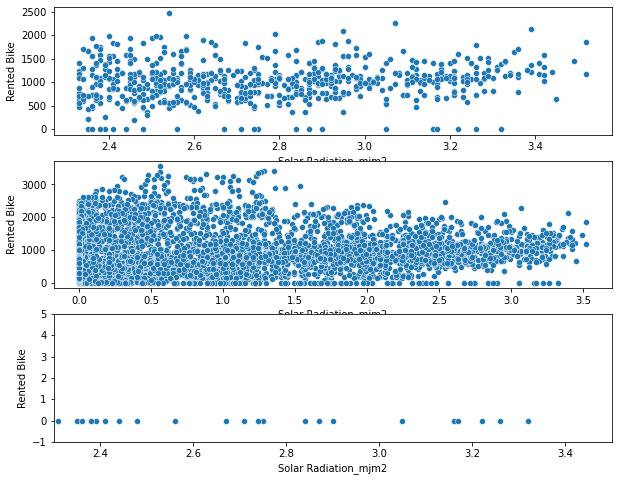

In [29]:
fig,(ax,ax2,ax3) = plt.subplots(3,1,figsize=(10,8))
sns.scatterplot(data=outliers,x='Solar Radiation_mjm2',y='Rented Bike',ax=ax)
sns.scatterplot(data=df,x='Solar Radiation_mjm2',y='Rented Bike',ax=ax2)
ax3.axis([2.3,3.5,-1,5])
sns.scatterplot(data=df,x='Solar Radiation_mjm2',y='Rented Bike',ax=ax3)

#after we identify the outliers deeper, i think the outliers are more like the third plot; i.e not following any trends

In [30]:
sol_out = df.loc[(df['Solar Radiation_mjm2']>2.3) & (df['Rented Bike']==0)].index
sol_out
df.drop(sol_out,axis=0,inplace=True)
#the outliers are no more

In [31]:
#reset index after dropping outliers
df = df.reset_index()

<AxesSubplot:xlabel='Rainfall_mm', ylabel='Rented Bike'>

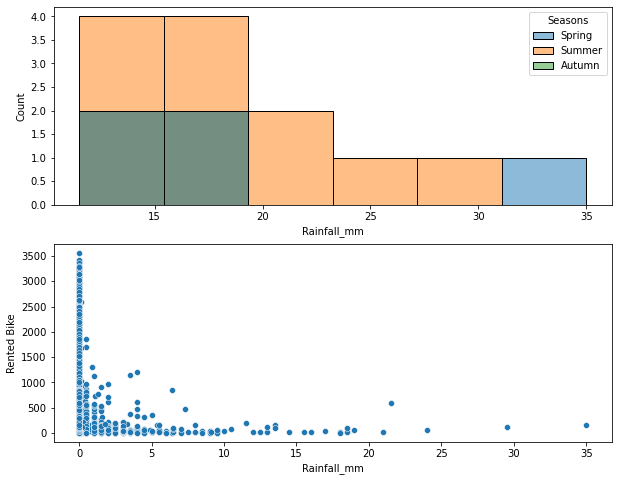

In [32]:
#Rainfall_mm
q1,q3,iqr,low_limit,top_limit,outliers = array_stat(df,'Rainfall_mm')
# i will assume that outliers are the rainfall mm more than 11 mm
outliers = outliers.loc[outliers['Rainfall_mm'] > 11]


#outliers capping/trimming 
outliers.index
#df.loc[outliers.index,'Rainfall_mm'] = 3*iqr #run only once

fig,(ax,ax2) = plt.subplots(2,1,figsize=(10,8))
sns.histplot(data=outliers,x='Rainfall_mm',hue='Seasons',ax=ax)
sns.scatterplot(data=df,x='Rainfall_mm',y='Rented Bike',ax=ax2)

In [33]:
q1,q3,iqr,low_limit,top_limit,outliers = array_stat(df,'Snowfall_cm')
#these data points are not outliers actually, just seasonality. need further techniques to be engineered
display(len(outliers))
df.loc[df['Snowfall_cm']!=0]['Seasons'].value_counts()

443

Winter    392
Autumn     51
Name: Seasons, dtype: int64

# EDA

### this section is for data analysis

# Feature Transformation
### for Regression Task

In [174]:
from scipy.stats import boxcox,normaltest
from scipy.special import boxcox1p

In [57]:
df = df.drop('index',axis=1)

In [59]:
df1 = df.copy()
df1.head()

,Date,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [67]:
num_col = df.columns[df.dtypes == (np.float64)]
num_col=num_col.append(df.columns[df.dtypes == np.int64])

In [68]:
num_col

Index(['Temperature_C', 'Wind speed_ms', 'Dew point temperature_C',
       'Solar Radiation_mjm2', 'Rainfall_mm', 'Snowfall_cm', 'Rented Bike',
       'Day Hour', 'Humidity_percent', 'Visibility_10m'],
      dtype='object')

<AxesSubplot:xlabel='Temperature_C', ylabel='Count'>

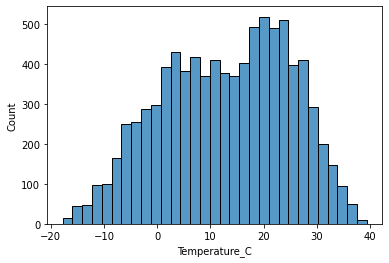

In [103]:
# temp_c dist check
sns.histplot(x=df1['Temperature_C'])

<AxesSubplot:xlabel='Wind speed_ms', ylabel='Count'>

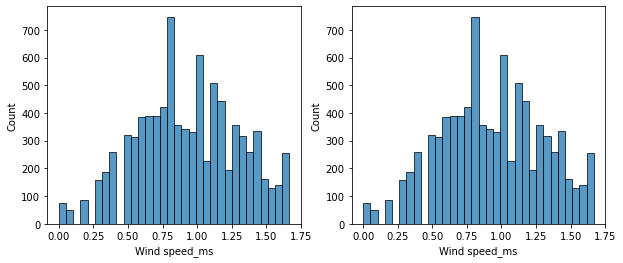

In [111]:
#Wind speed_ms dist check
new_wind = np.log1p(df1['Wind speed_ms'])
#apply transformation
df1['Wind speed_ms'] = new_wind


fig,(ax,ax2) = plt.subplots(1,2, figsize=(10,4))
sns.histplot(x=df1['Wind speed_ms'],ax=ax) # it needs to be transformed
sns.histplot(x=new_wind,ax=ax2) # looks more normal

<AxesSubplot:xlabel='Dew point temperature_C', ylabel='Count'>

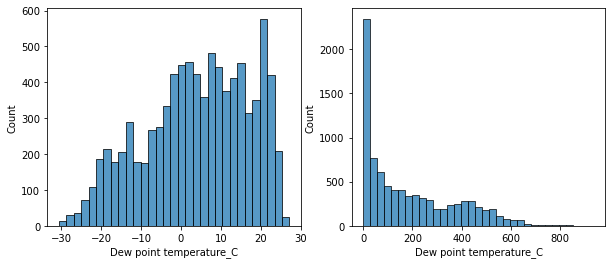

In [121]:
new_dew = df1['Dew point temperature_C']
fig,(ax,ax2) = plt.subplots(1,2, figsize=(10,4))
sns.histplot(x=df1['Dew point temperature_C'],ax=ax) # it needs to be transformed
sns.histplot(x=new_dew,ax=ax2) #there are no possible transformation, hence keep the existing

NormaltestResult(statistic=1189.755391083606, pvalue=4.445283043004005e-259)
NormaltestResult(statistic=2057.5818742305005, pvalue=0.0)


<AxesSubplot:xlabel='Solar Radiation_mjm2', ylabel='Count'>

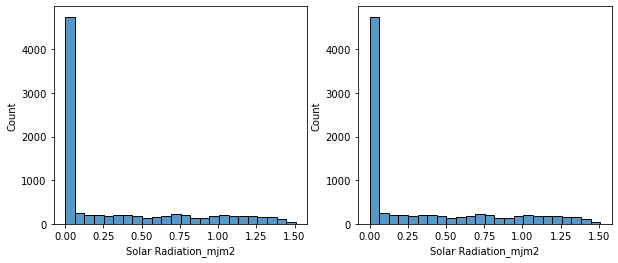

In [179]:

new_solar = np.log1p(df1['Solar Radiation_mjm2'])
print(normaltest(new_solar))
print(normaltest(df1['Solar Radiation_mjm2']))
df1['Solar Radiation_mjm2'] = new_solar #apply transformation
fig,(ax,ax2) = plt.subplots(1,2, figsize=(10,4))
sns.histplot(x=df1['Solar Radiation_mjm2'],ax=ax) # it needs to be transformed
sns.histplot(x=new_solar,ax=ax2) #atleast make it better

<AxesSubplot:xlabel='Rainfall_mm', ylabel='Count'>

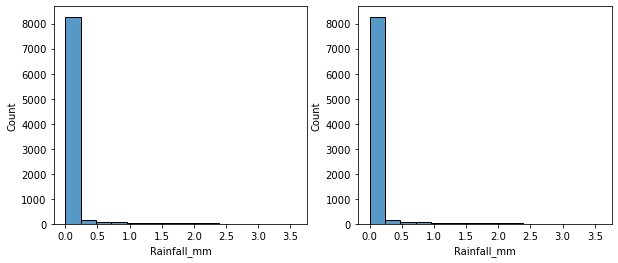

In [182]:
new_rain = np.log1p(df1['Rainfall_mm'])
df1['Rainfall_mm'] = new_rain #apply transformation
fig,(ax,ax2) = plt.subplots(1,2, figsize=(10,4))
sns.histplot(x=df1['Rainfall_mm'],ax=ax) # it needs to be transformed
sns.histplot(x=new_rain,ax=ax2) #atleast make it better

Transformed norm test:  NormaltestResult(statistic=948.751882720845, pvalue=9.575166168656365e-207)
default:  NormaltestResult(statistic=756.2243045195182, pvalue=6.13731950576228e-165)


<AxesSubplot:xlabel='Humidity_percent', ylabel='Count'>

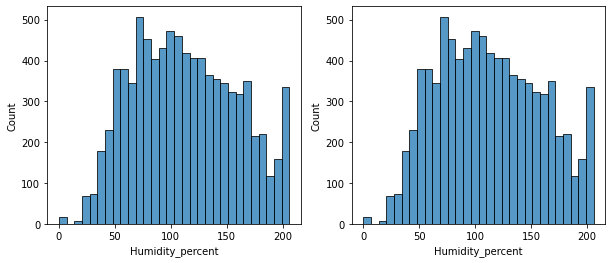

In [201]:
new_hum = boxcox1p(df1['Humidity_percent'],1.2)
print('Transformed norm test: ', normaltest(new_hum))
print('default: ', normaltest(df1['Humidity_percent']))
#boxcox1p lambda 1.2 is more better in norm test
df1['Humidity_percent'] = new_hum

fig,(ax,ax2) = plt.subplots(1,2, figsize=(10,4))
sns.histplot(x=df1['Humidity_percent'],ax=ax) # it needs to be transformed
sns.histplot(x=new_hum,ax=ax2) #atleast make it better

NormaltestResult(statistic=23267.771900716943, pvalue=0.0)
NormaltestResult(statistic=2245.9853136150446, pvalue=0.0)


<AxesSubplot:ylabel='Count'>

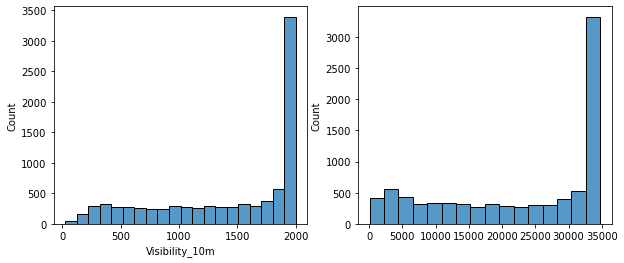

In [218]:
new_vis = boxcox(df1['Visibility_10m'])[0]

print(normaltest(new_vis))
print(normaltest(df1['Visibility_10m'])) 
#there is no difference in transformation
fig,(ax,ax2) = plt.subplots(1,2, figsize=(10,4))
sns.histplot(x=df1['Visibility_10m'],ax=ax) # it needs to be transformed
sns.histplot(x=new_vis,ax=ax2) #atleast make it better

### Feature Transformation Recap
- Wind speed_ms -> log1p
- Solar Radiation_mjm2 -> log1p
- Rainfaal -> log1p
- Humidity -> boxcox1p

In [219]:
df1.head()

,Date,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Weekday
0,2017-01-12,254,0,-5.2,64.714610,1.163151,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,66.789955,0.587787,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,68.875970,0.693147,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,70.972443,0.641854,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,62.650161,1.193922,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [220]:
df1['Holiday'].value_counts()

No Holiday    8306
Holiday        432
Name: Holiday, dtype: int64

In [221]:
df.to_csv('to_analyze_clean_seoulbike.csv')
df1.to_csv('to_modeling_clean_seoulbike.csv')

# modeling: Regression Task

In [4]:
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import ElasticNet,Ridge,Lasso,LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv("to_modeling_clean_seoulbike.csv")
df.drop(columns=['Unnamed: 0','Date'], axis=1, inplace=True)
df.head()

,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Weekday
0,254,0,-5.2,64.714610,1.163151,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,66.789955,0.587787,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,68.875970,0.693147,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,70.972443,0.641854,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,62.650161,1.193922,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# spring- summer model 
df_ss = df.loc[df['Seasons'].isin(['Spring','Summer'])].copy().drop(columns='Snowfall_cm',axis=1).reset_index(drop=True)
df_ss.head()

,Rented Bike,Day Hour,Temperature_C,Humidity_percent,Wind speed_ms,Visibility_10m,Dew point temperature_C,Solar Radiation_mjm2,Rainfall_mm,Seasons,Holiday,Weekday
0,71,0,2.0,200.977667,0.832909,1894,1.4,0.0,1.098612,Spring,Holiday,Yes
1,147,1,2.1,203.476865,0.182322,859,1.6,0.0,0.000000,Spring,Holiday,Yes
2,180,2,2.0,203.476865,0.693147,580,1.5,0.0,0.000000,Spring,Holiday,Yes
3,92,3,1.6,203.476865,1.193922,469,1.1,0.0,0.095310,Spring,Holiday,Yes
4,28,4,1.6,203.476865,0.741937,636,1.1,0.0,0.000000,Spring,Holiday,Yes


In [7]:
X = df_ss.drop('Rented Bike',axis=1)
y = df_ss['Rented Bike']
cat_col = X.columns[X.dtypes == np.object]
num_col = X.columns[X.dtypes != np.object]

In [87]:
len(X.columns)

11

In [60]:
num_trasformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

poly = PolynomialFeatures()
preprocessing_pipe = ColumnTransformer(transformers=[
    ('num',num_trasformer,num_col),
    ('cat',cat_transformer,cat_col)
])

L3_pipe = Pipeline(steps=[
    ('preprocessor',preprocessing_pipe),
    ('scaling',StandardScaler()),
    ('polynomial', PolynomialFeatures()),
    ('L3',ElasticNet(tol=0.01))
])

param_grid= {'L3__alpha':[0.01,0.5,1,3,5,10],'L3__l1_ratio':np.linspace(0,1,5),'L3__max_iter':[10000],'polynomial__degree':[2,4]}
l3_search = GridSearchCV(estimator=L3_pipe,param_grid=param_grid)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


In [15]:
# polynomial grid search
final_search.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['Day Hour', 'Temperature_C', 'Humidity_percent', 'Wind speed_ms',
       'Visibility_10m', 'Dew point temperature_C', 'Solar Radiation_mjm2',
       'Rainfall_mm'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                       

In [35]:
#final_search.best_estimator_.named_steps['polynomial'].get_feature_names()

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Polynomial regression

In [42]:
yhat_poly = final_search.predict(X_test)

#metrics evaluation on hold out test set
poly_mae = mean_absolute_error(y_test,yhat_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test,yhat_poly))
poly_r2 = r2_score(y_test,yhat_poly)

print("mean of the y hat: {}".format(np.mean(y)))
print("Polynomial regression MAE score: {}".format(poly_mae))
print("Polynomial regression RMSE score: {}".format(poly_rmse))
print("Polynomial regression R2 score: {}".format(poly_r2))

mean of the y hat: 884.6565977742448
Polynomial regression MAE score: 293.4903259236082
Polynomial regression RMSE score: 390.16239709328227
Polynomial regression R2 score: 0.6693238693048882


### Base Linear Regression Model

In [44]:
LR_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['Day Hour', 'Temperature_C', 'Humidity_percent', 'Wind speed_ms',
       'Visibility_10m', 'Dew point temperature_C', 'Solar Radiation_mjm2',
       'Rainfall_mm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Seasons', 'Ho

In [45]:
yhat_baseLR = LR_pipe.predict(X_test)

#metrics evaluation on hold out test set
LR_mae = mean_absolute_error(y_test,yhat_baseLR)
LR_rmse = np.sqrt(mean_squared_error(y_test,yhat_baseLR))
LR_r2 = r2_score(y_test,yhat_baseLR)

print("mean of the y hat: {}".format(np.mean(y)))
print("Linear regression MAE score: {}".format(LR_mae))
print("Linear regression RMSE score: {}".format(LR_rmse))
print("Linear regression R2 score: {}".format(LR_r2))

mean of the y hat: 884.6565977742448
Polynomial regression MAE score: 359.78258749649007
Polynomial regression RMSE score: 479.84186908708415
Polynomial regression R2 score: 0.49984074925764777


### Regularization applied

In [61]:
l3_search.fit(X_train,y_train)

D:\conda\envs\Kevin X DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250740238.6648543, tolerance: 14396883.420208268
  model = cd_fast.enet_coordinate_descent(
D:\conda\envs\Kevin X DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 251346543.2044554, tolerance: 14389224.060624804
  model = cd_fast.enet_coordinate_descent(
D:\conda\envs\Kevin X DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246368923.82165706, tolerance: 14139356.401794951
  model = cd_fast.enet_coordinate_descent(
D:\conda\envs\Kevin X DS\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['Day Hour', 'Temperature_C', 'Humidity_percent', 'Wind speed_ms',
       'Visibility_10m', 'Dew point temperature_C', 'Solar Radiation_mjm2',
       'Rainfall_mm'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(...quent')),
                                                                                      

In [62]:
l3_search.best_params_

{'L3__alpha': 0.01,
 'L3__l1_ratio': 0.75,
 'L3__max_iter': 10000,
 'polynomial__degree': 4}

In [63]:
l3_search.best_score_

0.7775536300685533

In [65]:
yhat_elasticLR = l3_search.predict(X_test)

#metrics evaluation on hold out test set
L3_mae = mean_absolute_error(y_test,yhat_elasticLR)
L3_rmse = np.sqrt(mean_squared_error(y_test,yhat_elasticLR))
L3_r2 = r2_score(y_test,yhat_elasticLR)

print("mean of the y hat: {}".format(np.mean(y)))
print("Polynomial regression MAE score: {}".format(L3_mae))
print("Polynomial regression RMSE score: {}".format(L3_rmse))
print("Polynomial regression R2 score: {}".format(L3_r2))

mean of the y hat: 884.6565977742448
Polynomial regression MAE score: 212.96796168019475
Polynomial regression RMSE score: 306.1322599677754
Polynomial regression R2 score: 0.7964222918698888


In [78]:
l3_search.best_estimator_.named_steps['polynomial'].get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x5 x13',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x6 x13',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x7 x13',
 'x8^2',
 'x8 x9',
 'x8 x10'

In [86]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])